# F1 optimal Lap Time

In [1]:
# Put parent folder in the pythonpath
import sys,os,inspect
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))))))
import fastest_lap
from fastest_lap import KMH

In [2]:
# Load vehicle
vehicle = "car"
fastest_lap.create_vehicle_from_xml(vehicle,"../../../../../database/vehicles/f1/mercedes-2020-catalunya.xml");
fastest_lap.vehicle_set_parameter(vehicle,"vehicle/rear-axle/smooth_throttle_coeff", 1.0e-2);

In [3]:
# Load track
track="catalunya"
fastest_lap.create_track_from_xml(track,"../../../../../database/tracks/catalunya/catalunya.xml");
s=fastest_lap.track_download_data(track,"arclength");

# Lap without limits

In [4]:
# Compute optimal laptime
options  = "<options>"
options += "    <output_variables>"
options += "        <prefix>run_without_limits/</prefix>"
options += "        <variables>"
options += "            <chassis.throttle/>"
options += "            <chassis.velocity.x/>"
options += "            <road.arclength/>"
options += "            <integral_quantities.engine-energy/>"
options += "        </variables>"
options += "    </output_variables>"
options += "    <print_level> 5 </print_level>"
options += "</options>"

fastest_lap.optimal_laptime(vehicle,track,s,options);

u_wo             = fastest_lap.download_vector("run_without_limits/chassis.velocity.x");
throttle_wo      = fastest_lap.download_vector("run_without_limits/chassis.throttle");
s_wo             = fastest_lap.download_vector("run_without_limits/road.arclength");
engine_energy    = fastest_lap.download_scalar("run_without_limits/integral_quantities.engine-energy");
print(f'Engine energy used: {engine_energy:.3f}.')

Engine energy used: 32.882.


# Lap with limits

In [5]:
# Compute optimal laptime
options  = "<options>"
options += "    <output_variables>"
options += "        <prefix>run/</prefix>"
options += "        <variables>"
options += "            <chassis.throttle/>"
options += "            <chassis.velocity.x/>"
options += "            <road.arclength/>"
options += "            <integral_quantities.engine-energy/>"
options += "        </variables>"
options += "    </output_variables>"
options += "    <integral_constraints>"
options += "        <engine-energy>"
options += "            <lower_bound> 0.0 </lower_bound>"
options += "            <upper_bound> 25.0 </upper_bound>"
options += "        </engine-energy>"
options += "    </integral_constraints> "
options += "    <print_level> 5 </print_level>"
options += "</options>"

fastest_lap.optimal_laptime(vehicle,track,s,options);

throttle      = fastest_lap.download_vector("run/chassis.throttle");
u             = fastest_lap.download_vector("run/chassis.velocity.x");
s             = fastest_lap.download_vector("run/road.arclength");
engine_energy = fastest_lap.download_scalar("run/integral_quantities.engine-energy");

## Throttle

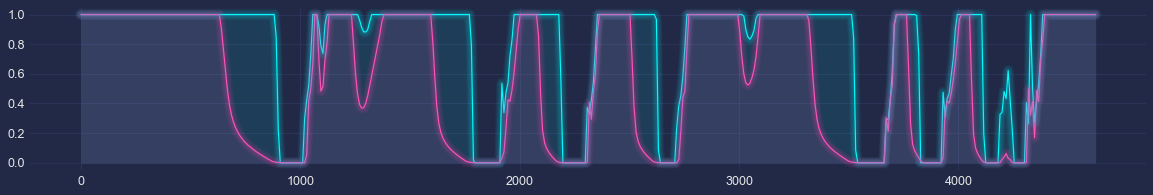

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

plt.figure(figsize=(20,3))
plt.plot(s,np.maximum(0,throttle_wo));
plt.plot(s,np.maximum(0,throttle));
mplcyberpunk.add_glow_effects()
